# Matplotlib

## 説明

`Matplotlib`（「マットプロットリブ」と読む）はプロットのための代表的なパッケージであり、ここではその使い方を解説する。プロットには`matplotlib`のモジュールである`pyplot`を使うことになる。慣例では`plt`としてインポートする。

In [1]:
import matplotlib.pyplot as plt

`pyplot`モジュールを使ってプロットする場合、主に３つのコードの書き方がる。

（書き方１） オブジェクト指向
```
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(...)
```
(書き方２) オブジェクト指向
```
fig, ax = plt.subplots()
ax.plot(...)
```
(書き方３) `Matlab`という有料ソフトのコードに沿った書き方
```
plt.plot(...)
```

以下では「（書き方２）オブジェクト指向」に沿って説明する。その為にまず、（書き方１）を使い`Matplotlib`の描画の手順を説明する。特に、「キャンバス」と「軸」の違いを覚えて欲しい。
1. 図を描くためのキャンバスを用意する。
    * それを行なっているのが（書き方１）の１行目である。右辺の`plt.figure()`でキャンバスを作成し、それを変数`fig`に割り当てている。キャンバスは実際に表示されないので、「透明のキャンバス」と理解すれば良いだろう。
1. キャンバス上に縦軸・横軸を描く。
    * それを行なっているのが（書き方１）の２行目である。右辺では、キャンバス`fig`のメソッド`add_subplot()`を使いキャンバスに縦軸・横軸を描き、それを左辺の変数`ax`に割り当てている。実際に、「書き方１」の２行のコードを実行すると透明のキャンバス上に軸が表示される。
    * 設置された軸`ax`にメソッド`plot()`などを使い直線・曲線・点など付け加えたり、タイトルなどの「飾り付け」をおこない作図することになる。
    * キャンバスには複数の軸を描くことが可能である。

この説明でわかることは、表示される`Matplotlib`で作成される「図」とは透明のキャンバス上に描かれ装飾された「軸」ということである。以下の説明では、キャンバス上の「図」を「軸」（英語で "axis"）と呼ぶことにする。

さて（書き方２）に話を戻すと、既に察している読者もいるかも知れないが、１行目は（書き方１）の最初の２行を１行に省略したものである。右辺の`plt.subplots()`は透明のキャンバスと軸の２つを同時に返す。最初が「キャンバス」でありそれを左辺の`fig`に、２つ目が「軸」であり`ax`に割り当てている。実際、１行目だけを実行すると軸が表示される。後は（書き方１）同様、`ax`のメソッド`plot()`などを使い軸を飾り付けして作図することになる。

ちなみに、（書き方３）は（書き方２）の３行を１行に省略した形になっており、本来は`Matlab`ユーザーの`Python`への移行を促す為に用意された書き方である。

## プロット方法

### 同じ`DataFrame`を使う

まず`Pandas`をインポートして図示に使う`DataFrame`を作成しよう。

In [2]:
import pandas as pd

x_list = [10, 20, 30]
y_list = [5.0, 30.0, 15.0]
z_list = [3.0, 2.0, 5.0]

dic = {'X':x_list, 'Y':y_list, 'Z':z_list}

df0 = pd.DataFrame(dic)

df0

,X,Y,Z
0,10,5.0,3.0
1,20,30.0,2.0
2,30,15.0,5.0


上述の（書き方２）を使って`X`をプロットしてみる。

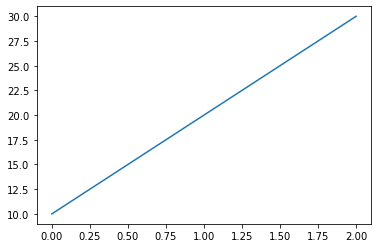

In [3]:
fig, ax = plt.subplots()
ax.plot('X', data=df0)
pass

次のコードでも同じ図を表示できる。違いは`data`を省略し、直接`df0['X']`を指定している。

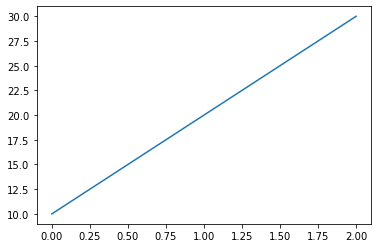

In [4]:
fig, ax = plt.subplots()
ax.plot(df0['X'])
pass

変数`Y`も同じ軸`ax`にプロットしてみよう。

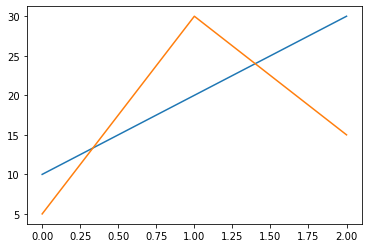

In [5]:
fig, ax = plt.subplots()
ax.plot('X', data=df0)
ax.plot('Y', data=df0)
pass

デフォルトでは横軸に行インデックが使われるが，横軸を指定したい場合を考えよう。例として、横軸に`X`、縦軸に`Y`を指定し、`Y`をプロットしてみよう。

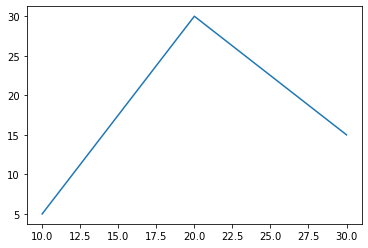

In [6]:
fig, ax = plt.subplots()
ax.plot('X','Y', data=df0)
pass

もちろん次のコードでも同じ図となる。

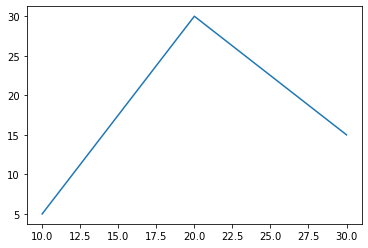

In [7]:
fig, ax = plt.subplots()
ax.plot(df0['X'],df0['Y'])
pass

### 異なる`DataFrame`の変数を図示する

別の`DataFrame`を作成する。

In [8]:
k_list = [15, 20, 10]
m_list = [25, 21, 23]

dic = {'K':k_list, 'M':m_list}
df1 = pd.DataFrame(dic)
print(df1)

    K   M
0  15  25
1  20  21
2  10  23


`df0`の`X`と`df1`の`K`を同じ図に表示する。

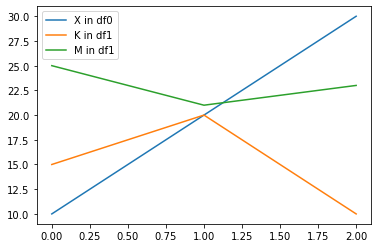

In [9]:
ax_ = df0['X'].plot()                           # 説明１
df1.plot(ax=ax_)                                # 説明２
ax_.legend(['X in df0','K in df1','M in df1'])  # 説明３
pass

（説明） 
1. 右辺は図を表示すると同時に軸のオブジェクトを返す。それを`ax_`に割り当てる。
1. 引数`ax`は`df1`の`K`と`M`をどの軸に描くかを決めすものであり、それを１行目の`ax_`とする。
1. 凡例の設定であり、リストとして指定する。`legend()`を使わないと上手く表示されない場合がある。

## 引数とメソッド

### `subplots()`の引数

`subplots()`はキャンバスと軸を設定する`plt`のメソッドとなるが、主に３つの引数を紹介する。
* `figsize`：図の大きさ
    * `figsize=(キャンバスの横幅、キャンバスの縦の長さ)`
* `nrows`（デフォルトは`1`）：軸の数を指定するために使う引数（「図を並べる」のセクションで説明する）
* `ncols`（デフォルトは`1`）：軸の数を指定するために使う引数（「図を並べる」のセクションで説明する）
* `sharex`（デフォルトは`False`）：複数の軸がある場合に使う引数（「図を並べる」のセクションで説明する）
* `sharey`（デフォルトは`False`）：複数の軸がある場合に使う引数（「図を並べる」のセクションで説明する）
* `tight_layout`（デフォルトは`False`）：複数の軸がある場合に使う引数（「図を並べる」のセクションで説明する）

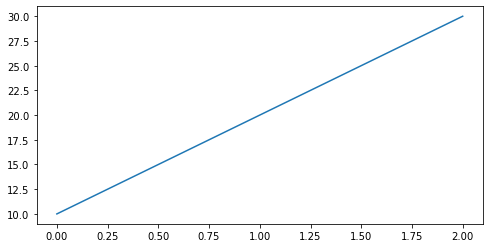

In [10]:
fix, ax = plt.subplots(figsize=(8,4))
ax.plot('X', data=df0)
pass

### `plot()`の基本的な引数

`plot()`は軸`ax`にデータを描くメソッドだが、引数を使うことによりデータの表示方法を指定できる。詳しくは[このリンク](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)を参照することにして，ここでは基本的な引数だけを紹介する。
* `linestyle`：線のスタイル（リストにして列の順番で指定する;`-``--``-.``:`などがある）
* `linewidth` or `lw`：線の幅
* `color` or `c`：色（[参照サイト](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)）
    * `r`は赤
    * `k`は黒
    * `g`はグリーン
* `marker`：観測値のマーカー（`o`，`.`，`>`，`^`などがある; [参照サイト](https://matplotlib.org/3.2.2/api/markers_api.html)）
* `markersize`：マーカーの大きさ
* `label`：以下で説明する`ax.legend()`がある場合に有効となる

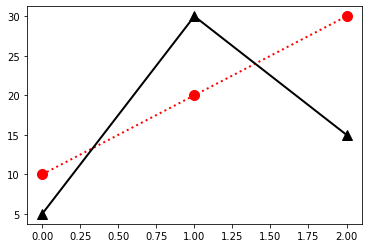

In [11]:
fix, ax = plt.subplots()
ax.plot('X', data=df0
           , linestyle=':'
           , linewidth=2
           , color='red'
           , marker='o'
           , markersize=10
           , label='X series')
ax.plot('Y', data=df0
           , linestyle='-'
           , linewidth=2
           , color='k'
           , marker='^'
           , markersize=10
           , label='X series')
pass

引数をいちいち書くのが面倒な場合、次の３つを簡略して一緒に指定できる。
* `linestyle`
* `color`
* `marker`

例えば、
* `linestyle=':'`
* `color='red'`
* `marker='o'`

の場合、`:ro`と書くことができる。

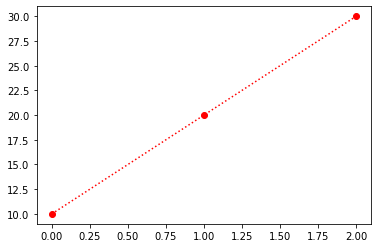

In [12]:
fix, ax = plt.subplots()
ax.plot('X', ':ro', data=df0,)
pass

（注意点）
* `:ro`は文字列
* `:`、`r`、`o`の順番を変えても良い。
* `:`や`:o`のように１つもしくは２つだけを指定しても良い。
* `:ro`は`=`を使う引数の前に置く。

詳細は[参考サイト（英語）](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html)を参照。

### `ax`の基本的なメソッド

`ax`は透明なキャンバス上にある軸を指しているが、そのメソッドを使うことにより、軸周辺を「飾り付け」することができる。
* `.set_title()`：タイトルを設定する。
    * 文字列で指定し、大きさは引数`size`で指定する。
* `.set_xlabel()`：横軸ラベル
    * 文字列で指定し、大きさは引数`size`で指定する。
* `.set_ylabel()`：縦軸ラベル
    * 文字列で指定し、大きさは引数`size`で指定する。
* `.legend()`：凡例を表示する。
    * `plot()`の引数`label`がなければ、データ・フレームの列ラベルが使われる。
    * `plot()`の引数`label`があれば、それが使われる。
* `.grid()`：グリッド線が表示される。

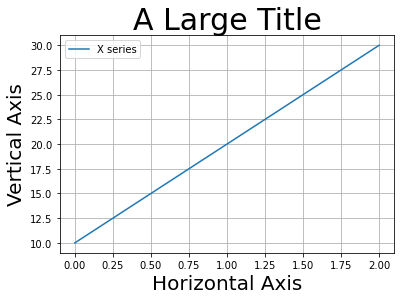

In [13]:
fig, ax = plt.subplots()
ax.plot('X', data=df0, label='X series')
ax.set_title('A Large Title', size= 30)     # タイトルの設定
ax.set_xlabel('Horizontal Axis', size=20)   # 横軸ラベルの設定
ax.set_ylabel('Vertical Axis', size=20)     # 縦軸ラベルの設定
ax.legend()
ax.grid()
pass

### 図を並べる

複数の図を並べたいとしよう。考え方としては、透明のキャンバスに複数の軸を設定し、それぞれの軸を使って作図していけば良いのである。キャンバスは四角なので偶数個の軸が設定できる。例として、次のように軸を配置したいとしよう。
```
+---+---+---+
| 1 | 2 | 3 |
+---+---+---+
| 4 | 5 | 6 |
+---+---+---+
```
２行・３列の配置になっており、左上から軸の番号が振られている。このような場合、`subplots()`の２つの引数が必須であり、別の２つの引数が有用である。
```
subplots(行の数, 列の数, sharex=False, sharey=False, tight_layout=False)
```
* 行の数（デフォルトは`1`）：上の例では`2`
* 列の数（デフォルトは`1`）：上の例では`3`
* `sharex`（デフォルトは`False`）：`True`にすると、全ての図で横軸が同じになり、不要な横軸の数字などを非表示になる。
* `sharey`（デフォルトは`False`）：`Ture`にすると、全ての図で縦軸が同じになり、不要な縦軸の数字などを非表示にする
* `tight_layout`（デフォルトは`False`）：`Ture`にすると、全ての図の間隔を調整して見やすくなる。

上の例を使うと次のようになる。

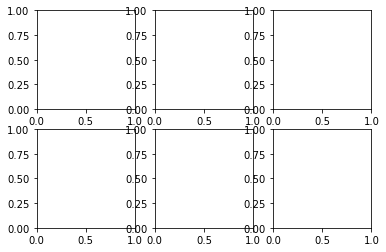

In [14]:
fig, ax = plt.subplots(2,3)

６つの軸が表示されているが、それらは`ax`に割り当てられている。`ax`を表示してみよう。

In [15]:
ax

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

`<AxesSubplot:>`が軸を示しており、それぞれの軸に対応している。

In [16]:
ax.shape

(2, 3)

軸は`(2,3)`の`array`に格納されているのが確認できる。従って、それぞれの軸は`array`の要素を抽出することによりアクセスできる。
* `ax[0,0]`：軸１を抽出
* `ax[0,1]`：軸２を抽出
* `ax[0,2]`：軸３を抽出
* `ax[1,0]`：軸４を抽出
* `ax[1,1]`：軸５を抽出
* `ax[1,2]`：軸６を抽出

これを使い次のように６つのを図示できる。

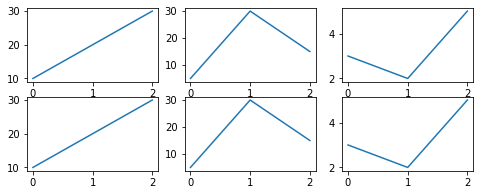

In [17]:
fig, ax = plt.subplots(2,3,figsize=(8,3))
ax[0,0].plot('X', data=df0)
ax[0,1].plot('Y', data=df0)
ax[0,2].plot('Z', data=df0)
ax[1,0].plot('X', data=df0)
ax[1,1].plot('Y', data=df0)
ax[1,2].plot('Z', data=df0)
pass

横軸と縦軸を共有するには次のようにする。

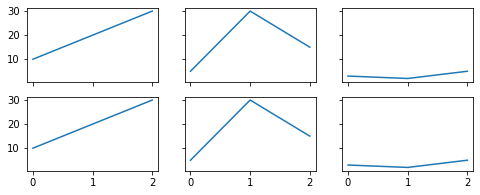

In [18]:
fig, ax = plt.subplots(2,3,figsize=(8,3),sharex=True,sharey=True)
ax[0,0].plot('X', data=df0)
ax[0,1].plot('Y', data=df0)
ax[0,2].plot('Z', data=df0)
ax[1,0].plot('X', data=df0)
ax[1,1].plot('Y', data=df0)
ax[1,2].plot('Z', data=df0)
pass

`ax`のメソッド（例えば、軸のタイトル）はそれぞれ設定することができる。

次に、キャンバス全体のタイトルを設定したいとしよう。キャンバスは`fig`に割り当てられているので、そのメソッド`suptitle`を使い表示することができる。

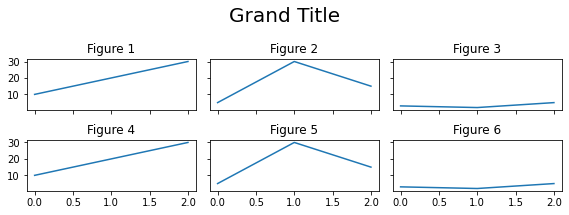

In [19]:
fig, ax = plt.subplots(2, 3, figsize=(8,3),
                       sharex=True, sharey=True,
                       tight_layout=True)
ax[0,0].plot('X', data=df0)
ax[0,0].set_title('Figure 1')

ax[0,1].plot('Y', data=df0)
ax[0,1].set_title('Figure 2')

ax[0,2].plot('Z', data=df0)
ax[0,2].set_title('Figure 3')

ax[1,0].plot('X', data=df0)
ax[1,0].set_title('Figure 4')

ax[1,1].plot('Y', data=df0)
ax[1,1].set_title('Figure 5')

ax[1,2].plot('Z', data=df0)
ax[1,2].set_title('Figure 6')

fig.suptitle("Grand Title", fontsize=20)
# fig.tight_layout()
pass

In [20]:
fig?

### ２軸グラフ

複数のデータを表示する際、右の縦軸を使いデータを表示したい場合がある。例を使って説明することにする。

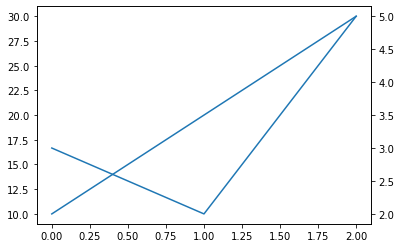

In [21]:
fig, ax1 = plt.subplots()  # (1)

ax2 = ax1.twinx()          # (2)

ax1.plot('X', data=df0)    # (3)
ax2.plot('Z', data=df0)    # (4)
pass

コードの説明

> 1. キャンバスと軸を作成し、軸を`ax1`に割り当てる。
> 2. `ax1`のメソッド`twinx()`を使い、右の縦軸を準備し`ax2`に割り当てる。
> 3. `ax1`に`X`をプロットする。
> 4. `ax2`に`Z`をプロットする。

また上で説明した方法で様々な「飾り付け」をすることができる。ただ、凡例については少し追加的なコードが必要となるので、それについても簡単に以下で説明する。

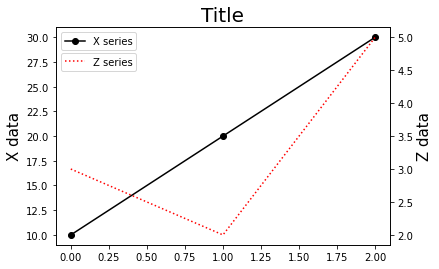

In [22]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot('X', 'k-o', data=df0, label='X series')
ax2.plot('Z', 'r:', data=df0, label='Z series')

ax1.set_title('Title', size=20)    # (1)
ax1.set_ylabel('X data', size=15)  # (2)
ax2.set_ylabel('Z data', size=15)  # (3)

ax1.legend()                       # (4)
ax2.legend(loc=(0.015,0.8))        # (5)
pass

コードの説明

> 1. 軸`ax1`にタイトルを設定しているが、`ax2`でも同じ図となる。
> 2. 軸`ax1`の縦軸（左）のラベルを設定する。
> 3. 軸`ax2`の縦軸（右）のラベルを設定する。
> 4. 軸`ax1`に描いた`X`の凡例を設定する。
>    * `legend()`には引数がないので`Matplotlib`が自動で凡例の位置を決める。この場合は図の左上に表示されている。
> 5. 軸`ax2`に描いた`Z`の凡例を設定する。
>    * `legend(loc=(0.015,0.8))`には引数`loc`があり、凡例の位置を指定している。`(0.015,0.8)`の数字は図の原点を`(0,0)`とて左の数字はx軸、右の数字はy軸の位置を指定している。もし引数を設定しないと、`X`の凡例を上書きすることになる。`(0.015,0.8)`のような指定方法だけではなく、他の方法もあるので[参照サイト](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)を参考にして欲しい。

## 日本語

２つ方法を紹介するが、`japanize_matplotlib`を使う方法がより簡単であろう。

### `japanize_matplotlib`

使い方は到って簡単で、`Pandas`と同様にインポートするだけである。

In [23]:
import japanize_matplotlib

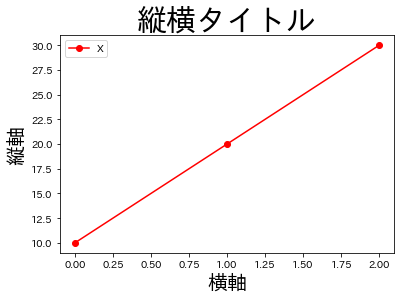

In [24]:
fix, ax = plt.subplots()
ax.plot('X', 'r-o', data=df0)
ax.set_title('縦横タイトル', size= 30)
ax.set_xlabel('横軸', size=20)
ax.set_ylabel('縦軸', size=20)
ax.legend()
pass

### フォントを指定する

2つの方法：
1. フォントはインストールせず、PC内にあるフォントを指定する。
1. フォントをインストールする方法

方法１の場合、以下で説明に使う変数`jfont`にフォントを指定する。
    * Macの場合、例えば`AppleGothic`
    * Windowsの場合、例えば`Yu Gothic`
    * この方法では一部の日本語が文字化けする場合がある。

方法２の場合：
* [このサイト](https://ipafont.ipa.go.jp/node193#jp)から次の内の１つをダウンロードする。
    * 2書体パック(IPAex明朝(Ver.xxx)、IPAexゴシック(Ver.xxx))
    * IPAex明朝 (Ver.xxx)
    * IPAexゴシック(Ver.xxx)
* [このサイト](https://ipafont.ipa.go.jp/node72#jp)に従ってインストールする。
* 次の両方もしくは１つがPCにインストールされる
    * IPAexMincho（IPAex明朝）
    * IPAexGothic（IPAexゴシック）

上の例を使い、設定方法の例を示す。

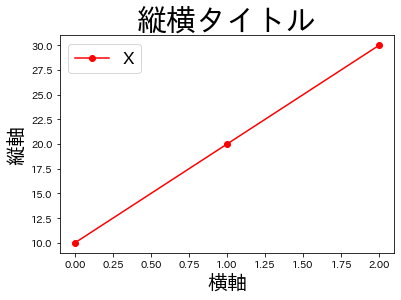

In [25]:
jfont = 'IPAexGothic'    # (1)

fix, ax = plt.subplots()
ax.plot('X', 'ro-', data=df0)
ax.set_title('縦横タイトル', size= 30, fontname=jfont)   # (2)
ax.set_xlabel('横軸', size=20, fontname=jfont)          # (3)
ax.set_ylabel('縦軸', size=20, fontname=jfont)          # (4)
ax.legend(prop={'family':jfont, 'size':17})            # (5)
pass

>* (1) 使用するフォントを`jfont`に割り当てる。
>* (2) 引数`fontname`で`jfont`を指定する。タイトルのフォントが変更される。
>* (3) 引数`fontname`で`jfont`を指定する。横軸名のフォントが変更される。
>* (4) 引数`fontname`で`jfont`を指定する。縦軸名のフォントが変更される。
>* (5) `legend`は他と設定方法が異なる。
    * `prop`はフォントのプロパティを設定する引数であり、辞書で指定する。
    * キー`family`に値`jfont`を指定する。凡例のフォントが変更される。
    * キー`size`に数値を設定してフォントの大きさが変更される。

この例では個別にフォントを設定したが、一括で全てのフォントを変更する方法もあるが説明は割愛する。

## マクロ経済学の例

### 投資関数

実質利子率`r`によって投資がどのように変化するかを考えてみよう。まず投資関数を次のように仮定する。

In [26]:
def investment(y):
    return 100/(1+r)

* `100`：実質利子率が`0`の場合の投資

実質利子率は次のリストで与えられるとする。

In [27]:
r_list = list(range(0, 50))   # %表示の利子率 

In [28]:
i_list = []   # 空のリスト

for r in r_list:
    inv = investment(r)   # 投資の計算
    i_list.append(inv)    # リストに追加

df_inv = pd.DataFrame({'Investment':i_list})   # DataFrameの作成

最初の5行を表示する。

In [29]:
df_inv.head()

,Investment
0,100.000000
1,50.000000
2,33.333333
3,25.000000
4,20.000000


最後の5行を表示する。

In [30]:
df_inv.tail()

,Investment
45,2.173913
46,2.127660
47,2.083333
48,2.040816
49,2.000000


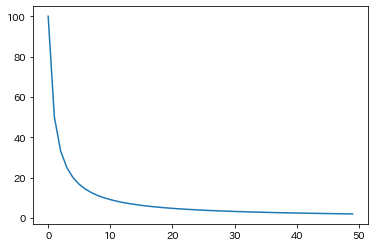

In [31]:
fix, ax = plt.subplots()
ax.plot(df_inv)
pass

`df_inv`はデータ・フレームだが、変数が１つしかないため`plot()`の引数に`df_inv`を指定するだけで`investment`のデータが描かれている。

### 将来価値

`x`万円を実質年率`r`%の利息を得る金融商品に投資し，`t`年間の将来価値（期首の値）をリストで示す関数は以下で与えられた。

In [32]:
def calculate_futre_value(x, r, t):
    
    value_list = [x]           # 初期値が入ったリスト
    
    for year in range(1,t+1):  # 1からtまでの期間
        x = x*(1+r)            # 来期のxの値の計算
        value_list.append(x)   # リストに追加
    
    return value_list          # リストを返す

これを使い，
* `x`=`100`
* `t`=`30`

の下で実質利子率が次のリストで与えられる値を取る場合の将来価値を図示する。

In [33]:
r_list = [0.01, 0.03, 0.06]   # 実質利子率のリスト
dic = {}                      # 空の辞書

for r in r_list:
    dic['r='+str(r)] = calculate_futre_value(100, r, 30)  # 辞書に追加

df_future = pd.DataFrame(dic) # DataFrameの作成

`dic['r='+str(r)]`の説明：
* `str(r)`：`r_list`の要素のダミーである`r`は浮動小数点型なので関数`str()`を使って文字列型に変換する。
* `'r='+str(r)`：文字列型の`r=`と文字列型の`str(r)`を`+`で結合する。
* `dic['r='+str(r)]`：辞書`dic`にキー・値のペアを作成する。
    * キー：`'r='+str(r)`
    * 値：`calculate_futre_value(100, r, 30)`の返り値

最初の5行を表示する。

In [34]:
df_future.head()

,r=0.01,r=0.03,r=0.06
0,100.000000,100.000000,100.000000
1,101.000000,103.000000,106.000000
2,102.010000,106.090000,112.360000
3,103.030100,109.272700,119.101600
4,104.060401,112.550881,126.247696


最後の5行を表示する。

In [35]:
df_future.tail()

,r=0.01,r=0.03,r=0.06
26,129.525631,215.659127,454.938296
27,130.820888,222.128901,482.234594
28,132.129097,228.792768,511.168670
29,133.450388,235.656551,541.838790
30,134.784892,242.726247,574.349117


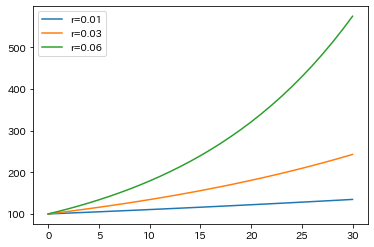

In [36]:
fix, ax = plt.subplots()
ax.plot('r=0.01', data=df_future)
ax.plot('r=0.03', data=df_future)
ax.plot('r=0.06', data=df_future)
ax.legend()
pass

`ax.plot()`が続いているので、`for`ループを使う事を推奨する。

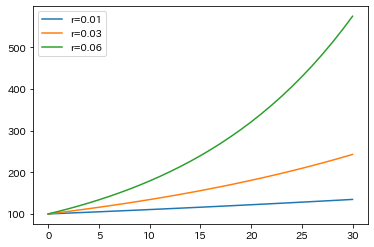

In [37]:
fix, ax = plt.subplots()

for col in df_future.columns:     # (1)
    ax.plot(col, data=df_future)

ax.legend()
pass

（１）の`df_future.columns`について説明すると、`.columns`はデータ・フレーム`df_future`の属性であり列ラベルを返す。